In [266]:
!pip install abbreviations

In [0]:
import re
import nltk
import random
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import display

import spacy
from spacy.tokenizer import Tokenizer
from bs4 import BeautifulSoup
from abbreviations import schwartz_hearst
from wordcloud import WordCloud, STOPWORDS

In [268]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
data_tagged = pd.read_csv("data/tagged.csv")

In [270]:
data_tagged.shape

(20332, 22)

In [271]:
data_tagged[:3]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,24551,1,24558.0,NaN,2008-08-23 19:59:42,NaN,403,130051,<p>I've been programming in C# and Java recent...,2635.0,Simucal,3916149.0,Chris Fournier,2019-09-19 13:42:04,2019-09-19 13:42:04,Initialize class fields in constructor or at d...,<java>,14,1,123,NaN,NaN
1,24596,1,24707.0,NaN,2008-08-23 20:58:25,NaN,85,18918,<p>I am considering creating my own website us...,2628.0,Kamikaze Mercenary,122607.0,Kamikaze Mercenary,2011-08-30 20:24:32,2012-11-24 17:05:17,What are the pros and cons of the assorted Jav...,<java><web-frameworks><rich-internet-application>,24,2,70,2011-09-03 12:00:57,NaN
2,2431333,1,2432520.0,NaN,2010-03-12 08:25:22,NaN,160,119895,"<p>I have a localized application, and I am wo...",79456.0,NaN,1548895.0,NaN,2018-05-14 17:36:07,2018-05-14 17:37:19,DisplayName attribute from Resources?,<c#><asp.net-mvc><localization><resources><resx>,6,0,65,NaN,NaN


In [272]:
data_tagged.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate'],
      dtype='object')

In [0]:
df_tagged = data_tagged[["Body", "Title", "Tags"]]

In [274]:
df_tagged.shape

(20332, 3)

In [275]:
df_tagged.dtypes

Body     object
Title    object
Tags     object
dtype: object

In [276]:
df_tagged.isna().sum()

Body     0
Title    0
Tags     0
dtype: int64

In [0]:
df_tagged = df_tagged[~df_tagged["Title"].isna()]

In [278]:
df_tagged.shape

(20332, 3)

In [0]:
for i, row in df_tagged.iterrows():
    df_tagged.loc[i,"Body"] = BeautifulSoup(str(row["Body"]), 'html.parser').get_text()

In [280]:
df_tagged

,Body,Title,Tags
0,I've been programming in C# and Java recently ...,Initialize class fields in constructor or at d...,<java>
1,I am considering creating my own website using...,What are the pros and cons of the assorted Jav...,<java><web-frameworks><rich-internet-application>
2,"I have a localized application, and I am wonde...",DisplayName attribute from Resources?,<c#><asp.net-mvc><localization><resources><resx>
3,I'm currently in the process of learning how t...,Creating a SearchView that looks like the mate...,<android><toolbar><android-appcompat><searchvi...
4,Let's say I have the following class X where I...,How do I remove code duplication between simil...,<c++><class><const><code-duplication><c++-faq>
...,...,...,...
20327,I can see why the auto type in C++11 improves ...,Can the use of C++11's 'auto' improve performa...,<c++><performance><c++11><auto>
20328,I have a fragment I am trying to add into a vi...,Android Fragment no view found for ID?,<android><android-fragments><illegalargumentex...
20329,I am having trouble with the AntiForgeryToken ...,include antiforgerytoken in ajax post ASP.NET MVC,<asp.net><ajax><asp.net-mvc><asp.net-mvc-3><csrf>
20330,I'm pretty new to AngularJS and I find it a bi...,How to master AngularJS?,<angularjs>


In [0]:
# Lowercase
def lowercase(val):
    return val.lower().strip()

In [0]:
# Data labeled lowercase
for f in ["Body", "Title", "Tags"]:
    df_tagged[f] = df_tagged[f].apply(lowercase)

In [283]:
df_tagged.head()

,Body,Title,Tags
0,i've been programming in c# and java recently ...,initialize class fields in constructor or at d...,<java>
1,i am considering creating my own website using...,what are the pros and cons of the assorted jav...,<java><web-frameworks><rich-internet-application>
2,"i have a localized application, and i am wonde...",displayname attribute from resources?,<c#><asp.net-mvc><localization><resources><resx>
3,i'm currently in the process of learning how t...,creating a searchview that looks like the mate...,<android><toolbar><android-appcompat><searchvi...
4,let's say i have the following class x where i...,how do i remove code duplication between simil...,<c++><class><const><code-duplication><c++-faq>


In [0]:
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner", "textcat"])

In [0]:
nlp.max_length = 10000000

In [0]:
tags = set()
for i, row in df_tagged.iterrows():
    labels = str(row["Tags"])
    x = labels.split(">")
    for t in x:
        if t.strip() != "":
            label = t[1:]
            tags.add(label)

In [287]:
paires_all = []
for i, row in df_tagged.iterrows():
    paires = schwartz_hearst.extract_abbreviation_definition_pairs(doc_text=str(row["Body"] + " " + row["Title"]))
    if paires:
        paires_all.append(paires)
paires_all

[{'lower_case': 'lower case separated by underscore'},
 {'kvo': 'key-value observation'},
 {'ioc': 'inversion of control'},
 {'cs+n': 'cs n =', 'sol 500': 'solution for n=500'},
 {'details': 'different way of handling the url structure i want to use'},
 {'crud': 'create, read, update and delete',
  "dto's": 'data transfer objects',
  "ejb's": 'enterprise javabeans',
  'jpql': 'java persistence query language',
  'jsp': 'java server pages',
  'slsb': 'stateless session bean',
  "vo's": 'value objects'},
 {'mro': 'method resolution order'},
 {'dao': 'data access object'},
 {'list': 'lists'},
 {'oom': 'out of memory'},
 {'imagededup': 'image deduplicator'},
 {'tlrbsf': 'typically-long-running-but-sometimes-fast'},
 {'jit': 'just-in-time'},
 {'cte': 'common table expression'},
 {'file': 'filereader'},
 {'repo a': 'repo, so the library'},
 {'they are': 'the runtime jars are available'},
 {'ace': 'adaptive communication environment'},
 {'int *': 'int bleh'},
 {'sine': 'should i read the real

In [288]:
len(paires_all)

267

In [0]:
mean_abbr = ["EJB's", "VO's", 'OOM', 'CTE', 'ACE', 'POS', 'PR',
             'RR', 'SQS', 'FP', 'FAB', 'TFS', 'DMG', 'VCS', 'API',
             'IoC', 'ORM', 'OOP', 'AOP', 'TFS', 'PUA', 'MIME', 'FRP',
             'BOM', 'CLR', 'PID', 'PPID', 'BSTs', 'IFS', 'SSO', 'pcc',
             'CA', 'ORM', 'IDE', 'NaB', 'RBM', 'nltk', 'ANR', 'CLI',
             'WAMP', 'MEF', 'STI', 'NOP', 'JRE', 'JDK', 'IV', 'FK', 'TFS',
             'PIC', 'DWR', 'ISA', 'TAP', 'UAC', 'CDI', 'regex', 'TAP',
             'RDD', 'CLT', 'CI', 'PPI', 'LSP', 'ARC', 'FTS', 'i.e.',
             'PIL', 'DSO', 'SSI', 'ARC', 'PCA', 'SVD', 'GA', 'TCO',
             'SSH', 'NOP', 'CLR', 'AMD', 'CA', 'RAII', 'DAO', 'JAXP',
             'px', 'DAO', 'DDD', 'TDD', 'EF', 'ELMAH', "DLL's", 'jwt',
             'EL', 'GC', 'OOP', 'HNF', 'NF', 'whnf', 'SM', 'nodeback',
             'std', 'CondVar', 'JWT', 'DSO', 'SSI', 'API', 'KVO', 'CRUD',
             'jsp', 'SLSB', 'DTOS', "bst's", "vo's", 'jpql', 'mro',
             'imagededup', 'tlrbsf', 'jit', 'utsttc', 'csrf', 'mosa',
             'gof', 'spas', 'bit-shift', 'di', 'ksh', 'aot', 'aio', 'gwt',
             'gil', 'waf', 'javac', 'dht', 'wss', 'et', 'ref', 'svn', 'enum',
             'nbsp', 'rbac', 'cbac', 'cgi', 'col', 'see', 'dfs', 'bfs', 'vss',
             'asi', 'pdb', 'abi', 'dbms', 'cef', 'em', 'rest', 'soap', 'sse',
             'dile', 'eh', 'cors', 'bpa', 'mvc', 'crtp', 'gp', 'zsh', 'eof',
             'mlp', 'csh', 'dt64', 'df', 'er', 'adb', 'cci', 'spi', 'vscode',
             'spa', 'l&f']

In [0]:
mean_abbr = [val.lower() for val in mean_abbr]

mean_abbr = sorted(list(set(mean_abbr)))

In [0]:
# Remove html tags
def remove_html_tags(text):
    return doc.Doc(text).clean

# Lower case
def lowercase(text):
    return text.lower().strip()

# Change the abbreviations by their full value
def abbreviation(text):
    paires = schwartz_hearst.extract_abbreviation_definition_pairs(doc_text=text)
    keys = [k for k, v in paires.items()]
    document = nlp(text)
    words = []
    for token in document:
        if token.text in keys and  token.text in mean_abbr:
            words.append(paires[token.text])
        else:
            words.append(token.text)

    return ' '.join(words)
    
def remove_contract_form(text):
    document = nltk.word_tokenize(text) #nlp(text)
    words = []
    for token in document:
        text = token
        text = re.sub(r"\'m", "am", text)
        text = re.sub(r"\'re", "are", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"n't", "not", text)
        text = re.sub(r"\'ve", "have", text)
        text = re.sub(r"\'d", "would", text)
        text = re.sub(r"\'ll", "will", text)
        words.append(text)
    return ' '.join(words)

# Delete STOP WORDS
def del_stop_words(text):
    document = nlp(text)
    words = [token.text for token in document if not token.is_stop]
    return ' '.join(words)

# Delete punctuation
def del_punct(text):
    document = nlp(text)
    words = [token.text for token in document if not token.is_punct]
    return ' '.join(words)

# Lemmatization
def lemmatization(text):
    document = nlp(text)
    words = [token.lemma_ for token in document if not token.is_punct]
    return ' '.join(words)

# Remove special characters and bad symbols
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;-_+]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #]')
def clean_spec_bad(text):
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub(' ', text)
    return text

def remove_numbers(text):
    document = nlp(text)
    words = [token.text for token in document if not token.text.isdigit()]
    return ' '.join(words)

def delete_multiple_space(text):
    return ' '.join(text.split())

# Delete string of length = 1 and not in tags
def low_length(text):
    document = nlp(text)
    words = []
    for token in document:
        if len(token.text) > 1:
            words.append(token.text)
        else:
            if token.text in tags:
                words.append(token.text) 
    return ' '.join(words)

def remove_numbers_from_string(text):
    document = nlp(text)
    words = []
    for token in document:
        words.append(''.join([i for i in token.text if not i.isdigit()]))
    return ' '.join(words)

def save_potential_keywords(text):
    document = nlp(str(text))
    words = [token.text for token in document if token.pos_ in ['NOUN', 'VERB', 'ADJ']]
    return ' '.join(words)

In [0]:
#nlp.tokenizer = Tokenizer(nlp.vocab)

In [0]:
# Labelled data
def clean_text_tagged(df_tagged=df_tagged):
    for f in ["Body", "Title"]:
        df_tagged[f] = df_tagged[f].apply(abbreviation)
        df_tagged[f] = df_tagged[f].apply(remove_contract_form)
        df_tagged[f] = df_tagged[f].apply(clean_spec_bad)
        df_tagged[f] = df_tagged[f].apply(del_stop_words)
        df_tagged[f] = df_tagged[f].apply(remove_numbers_from_string)
        df_tagged[f] = df_tagged[f].apply(delete_multiple_space)
        df_tagged[f] = df_tagged[f].apply(low_length)
        df_tagged[f] = df_tagged[f].apply(lemmatization)
    
clean_text_tagged()

In [0]:
corpus = ' '.join(df_tagged['Body'])
corpus += ' ' + ' '.join(df_tagged['Title'])
words = corpus.split()
dict_words = {}
for word in words:
    if word in dict_words:
        dict_words[word] += 1
    else:
        dict_words[word] = 1

In [0]:
dict_words_sort = {k: v for k, v in sorted(dict_words.items(), key=lambda item: item[1], reverse=False)}

In [0]:
words_save = [k for k, v in sorted(dict_words.items(), key=lambda item: item[1], reverse=True) if v > 2]

In [0]:
def delete_words_infrequent(text):
    document = nlp(text)
    words = [token.text for token in document if token.text in words_save]
    return ' '.join(words)

In [0]:
# Delete the infrequent words
for f in ["Body", "Title"]:
    df_tagged[f] = df_tagged[f].apply(delete_words_infrequent)

In [0]:
document_body = nlp(''.join(df_tagged['Body']))
document_title = nlp(''.join(df_tagged['Title']))
document_tags = nlp(''.join(df_tagged['Tags']))

,unique,total
Body,20332,1119207
Title,20254,80238
Tags,16617,33251


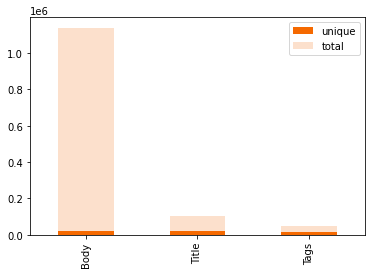

In [300]:
stats = {}

stats["Body"] = {"unique": df_tagged["Body"].nunique(), "total": len(document_body)}
stats["Title"] = {"unique":df_tagged["Title"].nunique(), "total": len(document_title)}
stats["Tags"] = {"unique":df_tagged["Tags"].nunique(), "total": len(document_tags)}

df_stats = pd.DataFrame.from_dict(stats, orient='index')

df_stats.sort_values(by='total', ascending=False, inplace=True)
df_stats.plot(kind='bar', color=["#f56900", "#fce0cc"], stacked=True)
df_stats

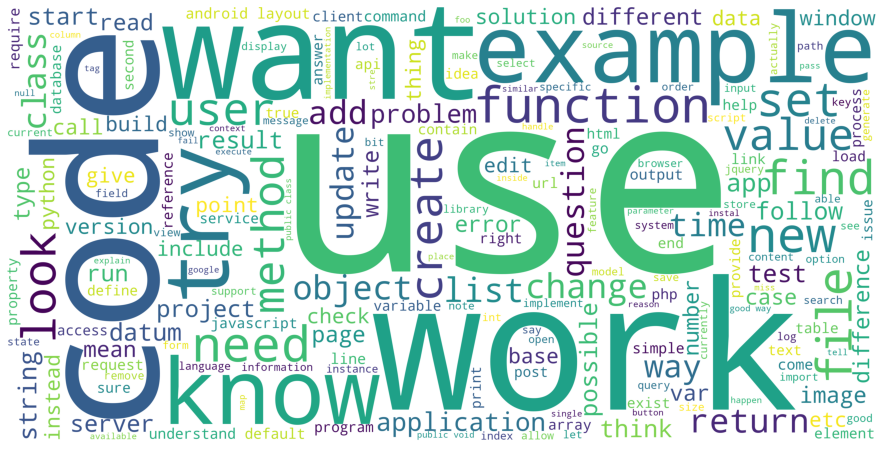

In [301]:
body_corpus = ' '.join(df_tagged['Body'])

body_wordcloud = WordCloud(background_color = 'white',
                           height = 2000, width = 4000).generate(body_corpus)
plt.figure(figsize = (16,8))
plt.imshow(body_wordcloud)
plt.axis('off')
plt.show()

In [0]:
words_body = [token.text for token in document_body]
words_body_freq = Counter(words_body)

words_title = [token.text for token in document_title]
words_title_freq = Counter(words_title)

In [303]:
words_body_freq.most_common(5) 

[('file', 9019),
 ('use', 8414),
 ('like', 8036),
 ('code', 6763),
 ('android', 6328)]

In [304]:
words_title_freq.most_common(5)

[('file', 965), ('vs', 759), ('git', 469), ('way', 449), ('string', 418)]

In [305]:
body_corpus

Output hidden; open in https://colab.research.google.com to view.

In [0]:
df_tagged.to_csv("data/tagged_processed.csv", sep=",", index=False)

In [0]:
df_untagged = df_tagged[['Body', 'Title']].copy()

In [0]:
for f in ['Body', 'Title']:
    df_untagged[f] = df_untagged[f].apply(save_potential_keywords)

In [309]:
df_untagged

,Body,Title
0,curious good place initialize public class dic...,initialize class field constructor
1,consider create website java try decide framew...,web
2,localized application wonder possible displayn...,resource
3,process learn app material design bit stuck ri...,create searchview look material design guideline
4,let follow class want return access internal m...,remove duplication similar member function
...,...,...
20327,auto type c improve correctness maintainabilit...,use auto improve performance
20328,fragment try add view fragmentmanager getsuppo...,view find
20329,trouble mvc try solution jquery call solution ...,include net
20330,find bit easy stuff easy advanced thing hard d...,


In [0]:
document_body = nlp(''.join(df_untagged['Body']))
document_title = nlp(''.join(df_untagged['Title']))

,unique,total
Body,20168,736413
Title,14996,41280


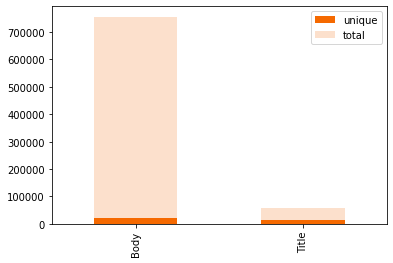

In [311]:
stats = {}

stats["Body"] = {"unique": df_untagged["Body"].nunique(), "total": len(document_body)}
stats["Title"] = {"unique":df_untagged["Title"].nunique(), "total": len(document_title)}

df_stats = pd.DataFrame.from_dict(stats, orient='index')

df_stats.sort_values(by='total', ascending=False, inplace=True)
df_stats.plot(kind='bar', color=["#f56900", "#fce0cc"], stacked=True)
df_stats

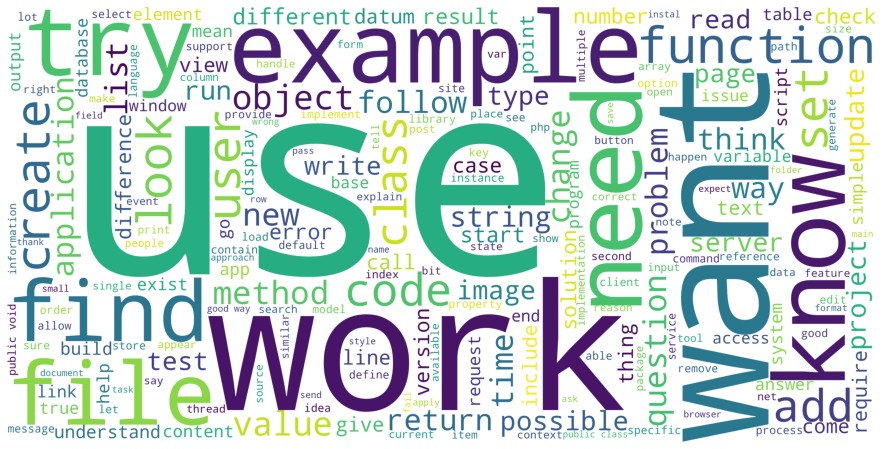

In [312]:
body_corpus = ' '.join(df_untagged['Body'])

body_wordcloud = WordCloud(background_color = 'white',
                           height = 2000, width = 4000).generate(body_corpus)
plt.figure(figsize = (16,8))
plt.imshow(body_wordcloud)
plt.axis('off')
plt.show()

In [0]:
df_untagged.to_csv("data/untagged_processed.csv", sep=",", index=False)